# Explorando los programas de gobierno (presidenciales Chile 2021)


## 1. Nubes de palabras

In [ ]:
#!pip install numpy pandas matplotlib pillow wordcloud nltk

In [ ]:
from collections import Counter
import re
import pandas as pd
import numpy as np

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/Benjamin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Benjamin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('spanish'))

In [ ]:
def wordlcoud_programa(programa, candidato):
    tokenizado = word_tokenize(programa.lower())
    pal_filtradas = [word for word in tokenizado if word.isalnum() and word not in stop_words]
    text_filtrado = ' '.join(pal_filtradas)

    wordcloud_1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_filtrado)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud_1, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras: programa de {candidato} (2021)')
    plt.show()

In [ ]:
import os
import glob

In [ ]:
ruta = 'procesado/'

archivos_txt = glob.glob(os.path.join(ruta, '*.txt'))

contenido_archivos = []
nombre_archivos = []

for archivo in archivos_txt:
    with open(archivo, 'r', encoding='utf-8') as f:
        contenido = f.read()
        contenido_archivos.append(contenido)
        nombre_archivos.append(archivo)


for idx, contenido in enumerate(contenido_archivos):
    print(f'Contenido del archivo {idx+1}: \n{contenido[:100]}...\n')




Contenido del archivo 1: 
Un proyecto reformista de centro y centroderecha debe pensar el Estado como el medio a través del cu...

Contenido del archivo 2: 
4I. LA PERSPECTIV A DE UN NUEVO CHILELa revuelta social que se inició el 18 de octubre de 2019 no fu...

Contenido del archivo 3: 
 Plan de Gobierno Apruebo Dignidad Nuestro Plan de Gobierno tiene cuatro perspectivas transversales ...

Contenido del archivo 4: 
Hacia un Modelo Socioambiental de Desarrollo Económico 1 / Hacia un Modelo Socioambiental de Desarro...

Contenido del archivo 5: 
    Las 5 Grandes Medidas  1 De la Convención a la Asamblea Constituyente :  El Gobierno Patriótico ...

Contenido del archivo 6: 
     NUEVA INSTITUCIONALIDAD PUBLICA  1. Votación Representativa y Participativa  Esta propuesta de ...

Contenido del archivo 7: 
Chile en Paz y Orden El avance del narcotráfico y la llegada de crímenes violentos como los asesinat...



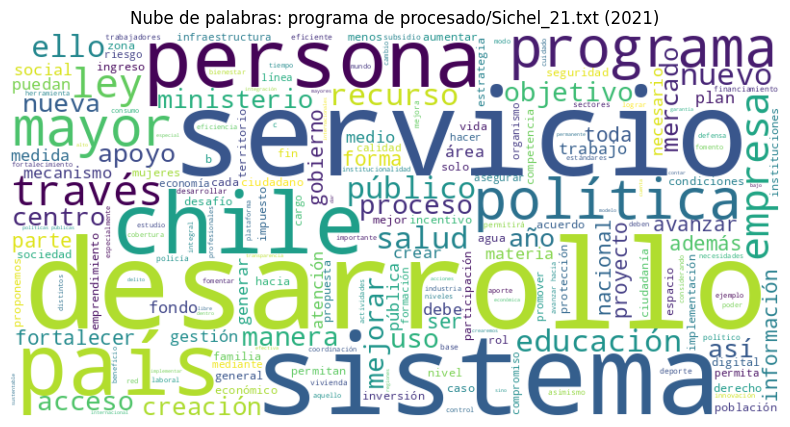

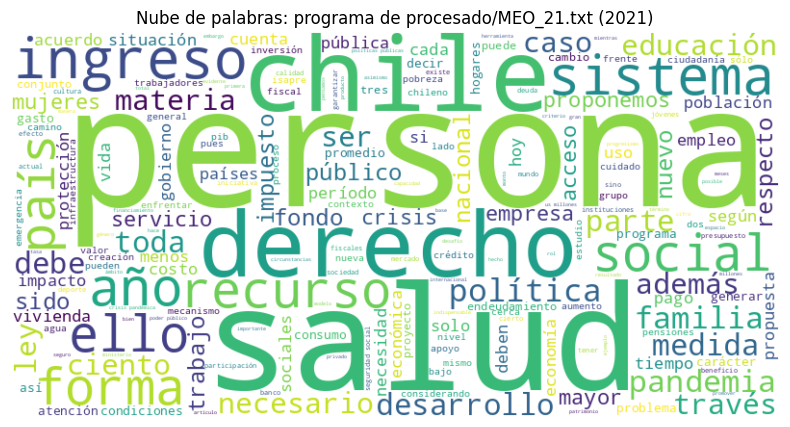

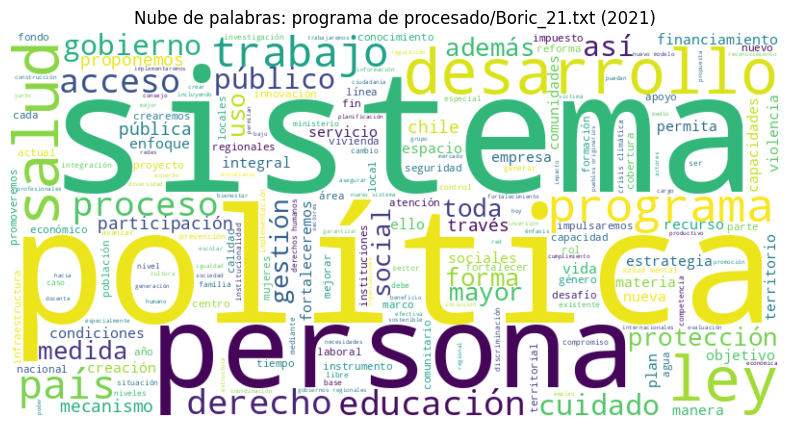

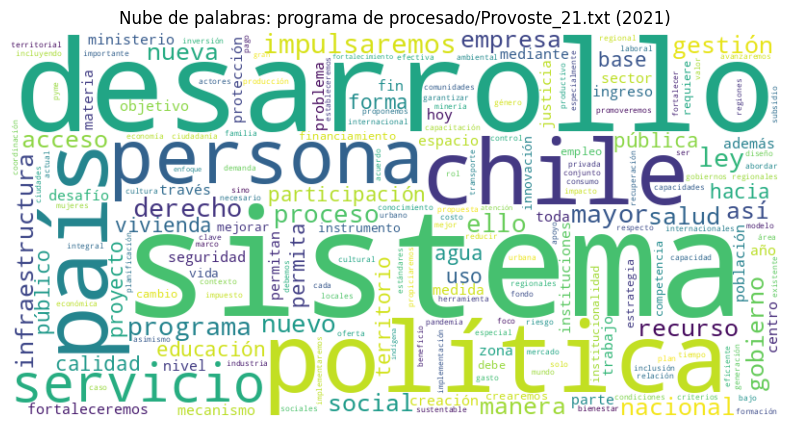

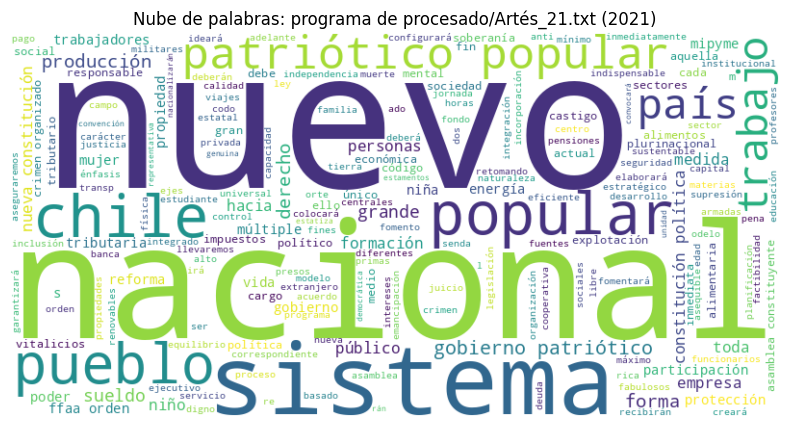

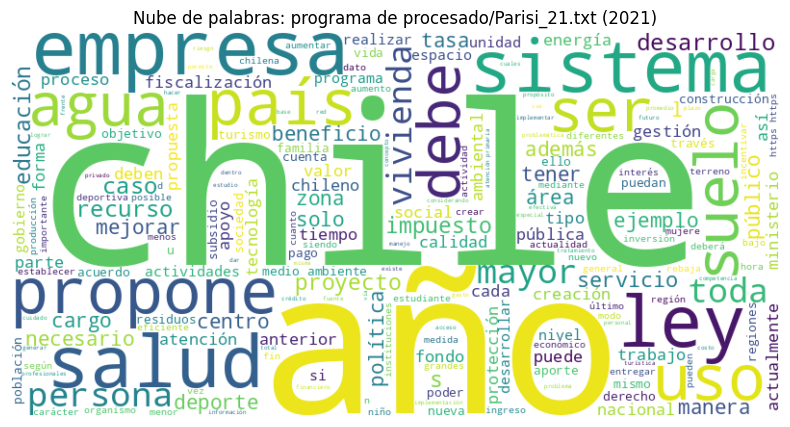

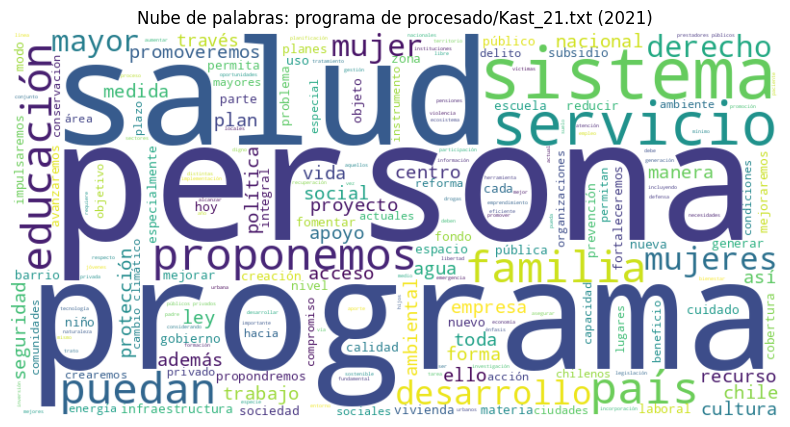

In [ ]:
for programa, candidato in zip(contenido_archivos, nombre_archivos):
    wordlcoud_programa(programa, candidato)


## Análisis temático

In [ ]:
from collections import defaultdict

In [ ]:
temas_palabras = {
    'Economía': ['economía', 'crecimiento', 'PIB', 'empleo', 'trabajo', 'salario', 'inversión', 'mercado', 'impuestos', 'presupuesto', 'finanzas'],
    'Salud': ['salud', 'hospitales', 'medicina', 'enfermería', 'atención', 'médica', 'seguro', 'enfermedades', 'vacunación', 'sistema', 'salud'],
    'Educación': ['educación', 'escuelas', 'universidades', 'profesores', 'alumnos', 'formación', 'aprendizaje', 'becas', 'currículo', 'sistema', 'educativo'],
    'Seguridad': ['seguridad', 'policía', 'crimen', 'delincuencia', 'violencia', 'justicia', 'cárceles', 'prevención', 'protección'],
    'Medio Ambiente': ['medio', 'ambiente', 'cambio', 'climático', 'contaminación', 'sostenibilidad', 'recursos', 'naturales', 'energía', 'renovable', 'biodiversidad', 'conservación'],
    'Derechos Humanos': ['derechos', 'humanos', 'igualdad', 'discriminación', 'justicia', 'social', 'derechos', 'civiles', 'género', 'diversidad', 'inclusión', 'libertad'],
    'Política Exterior': ['política', 'exterior', 'relaciones', 'internacionales', 'tratados', 'diplomacia', 'comercio', 'exterior', 'cooperación', 'alianzas', 'inmigración'],
    'Tecnología e Innovación': ['tecnología', 'innovación', 'digitalización', 'ciencia', 'investigación', 'desarrollo', 'internet', 'telecomunicaciones', 'ciberseguridad']}

In [ ]:
def contar_freq_palabras(programa, temas_palabras):
    tokenizado = word_tokenize(programa.lower())
    pal_filtradas = [word for word in tokenizado if word.isalnum() and word not in stop_words]

    frecuencias = defaultdict(lambda: defaultdict(int))

    for palabra in tokenizado:
        for tema, palabras in temas_palabras.items():
            if palabra in palabras:
                frecuencias[tema][palabra] += 1
    return frecuencias

In [ ]:
freq_1 = contar_freq_palabras(contenido_archivos[0], temas_palabras)

freq_1

defaultdict(<function __main__.contar_freq_palabras.<locals>.<lambda>()>,
            {'Medio Ambiente': defaultdict(int,
                         {'medio': 38,
                          'recursos': 78,
                          'sostenibilidad': 12,
                          'naturales': 12,
                          'cambio': 33,
                          'climático': 20,
                          'conservación': 16,
                          'energía': 14,
                          'ambiente': 6,
                          'contaminación': 10,
                          'biodiversidad': 14,
                          'renovable': 1}),
             'Tecnología e Innovación': defaultdict(int,
                         {'desarrollo': 145,
                          'internet': 12,
                          'ciberseguridad': 11,
                          'innovación': 26,
                          'tecnología': 14,
                          'ciencia': 8,
                          'investigac

In [ ]:
freq_1['Derechos Humanos']['diversidad']

12

In [ ]:
for tema, palabra in freq_1.items():
    print(f'El tema es {tema}')
    for elnombre in palabra:
        print(f'La palabra es {elnombre}')

El tema es Medio Ambiente
La palabra es medio
La palabra es recursos
La palabra es sostenibilidad
La palabra es naturales
La palabra es cambio
La palabra es climático
La palabra es conservación
La palabra es energía
La palabra es ambiente
La palabra es contaminación
La palabra es biodiversidad
La palabra es renovable
El tema es Tecnología e Innovación
La palabra es desarrollo
La palabra es internet
La palabra es ciberseguridad
La palabra es innovación
La palabra es tecnología
La palabra es ciencia
La palabra es investigación
La palabra es digitalización
La palabra es telecomunicaciones
El tema es Economía
La palabra es impuestos
La palabra es presupuesto
La palabra es mercado
La palabra es trabajo
La palabra es inversión
La palabra es crecimiento
La palabra es economía
La palabra es empleo
La palabra es finanzas
El tema es Política Exterior
La palabra es política
La palabra es alianzas
La palabra es internacionales
La palabra es comercio
La palabra es relaciones
La palabra es cooperaci

In [ ]:
l1 = []
l2 = []

for tema, palabra in freq_1.items():
    l1.append(tema)
    l2.append(palabra)

In [ ]:
l2[0].values()

dict_values([38, 78, 12, 12, 33, 20, 16, 14, 6, 10, 14, 1])

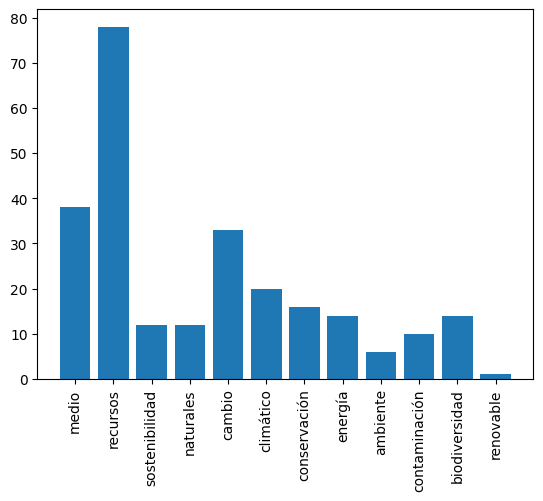

In [ ]:

height = l2[0].values()

bars = l2[0].keys()

y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation = 90)

plt.show()

In [ ]:
df = pd.DataFrame(freq_1)

df

,Medio Ambiente,Tecnología e Innovación,Economía,Política Exterior,Salud,Educación,Derechos Humanos,Seguridad
medio,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recursos,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sostenibilidad,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
naturales,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cambio,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
prevención,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
crimen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
policía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
violencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0


In [ ]:
columnas = df.columns

long_df = df.melt(value_vars=columnas, ignore_index=False).reset_index()

long_df= long_df[long_df.value.notnull()]



In [ ]:
long_df.to_csv('salida1.csv')

In [ ]:
import seaborn as sns

KeyError: 'variable'

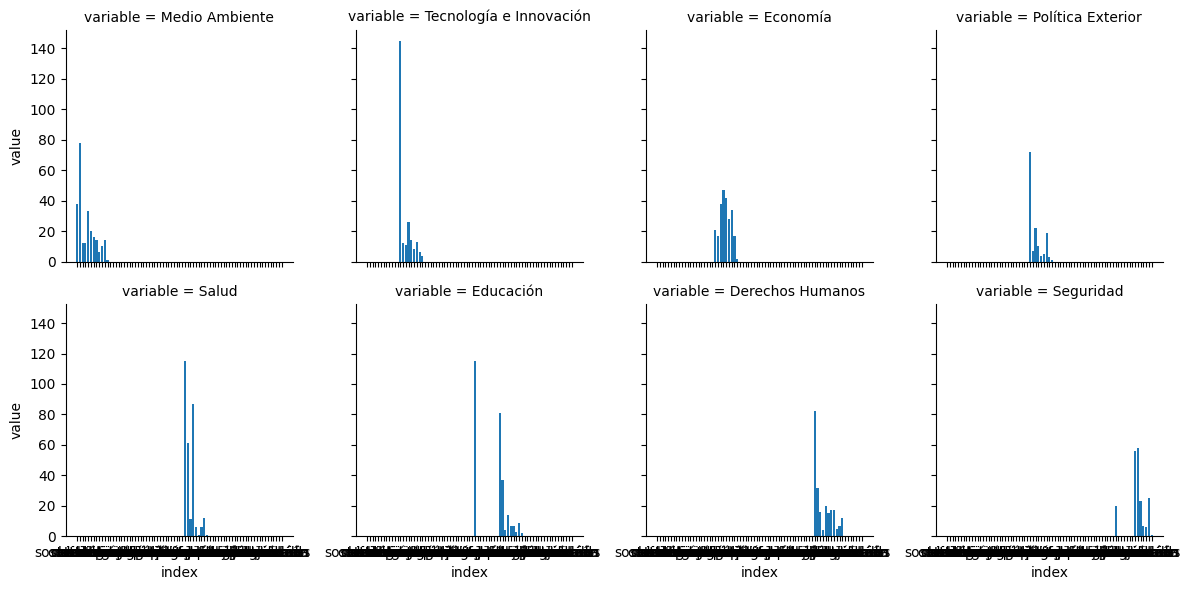

In [ ]:
g = sns.FacetGrid(long_df, col='variable', col_wrap=4)

g = g.map(plt.bar, 'index', 'value').set_titles('{variable}')

g = g.set_titles('{variable}')

plt.show()

<Axes: xlabel='variable'>

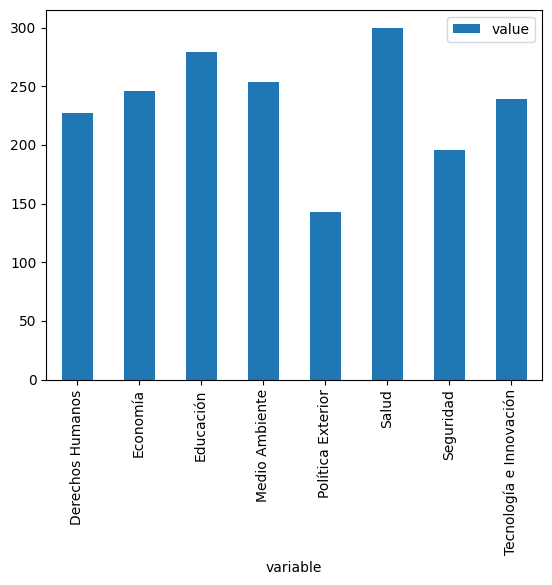

In [ ]:
agrupado = long_df.groupby('variable').agg('sum')

agrupado.plot.bar()

In [ ]:
Candidatos = [i.replace('procesado/', '') for i in archivos_txt]
Candidatos = [i.replace('_21.txt', '') for i in Candidatos]

Candidatos

['Sichel', 'MEO', 'Boric', 'Provoste', 'Artés', 'Parisi', 'Kast']

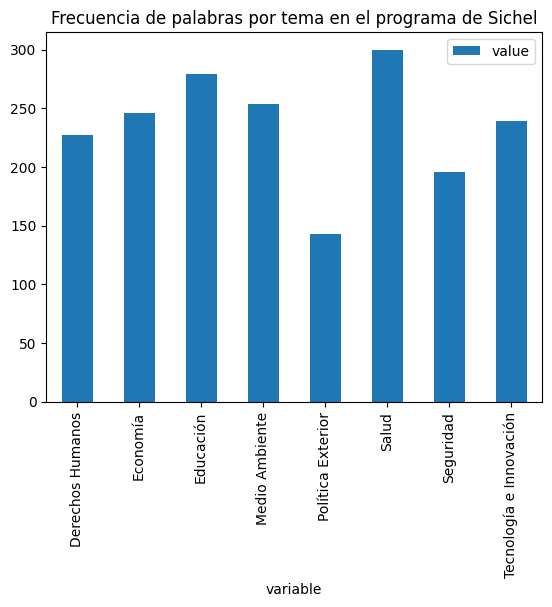

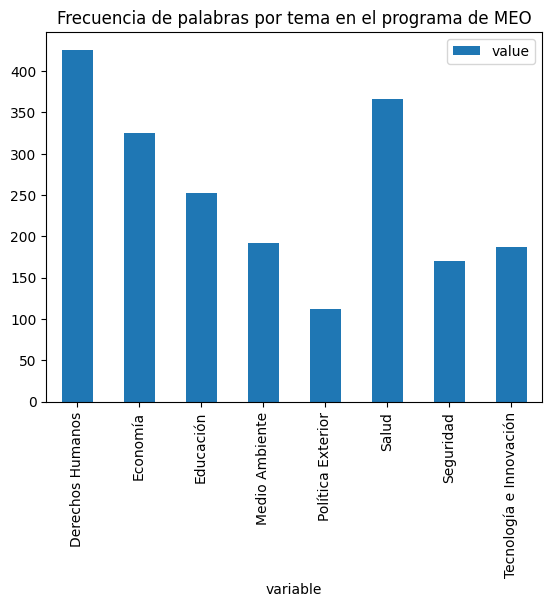

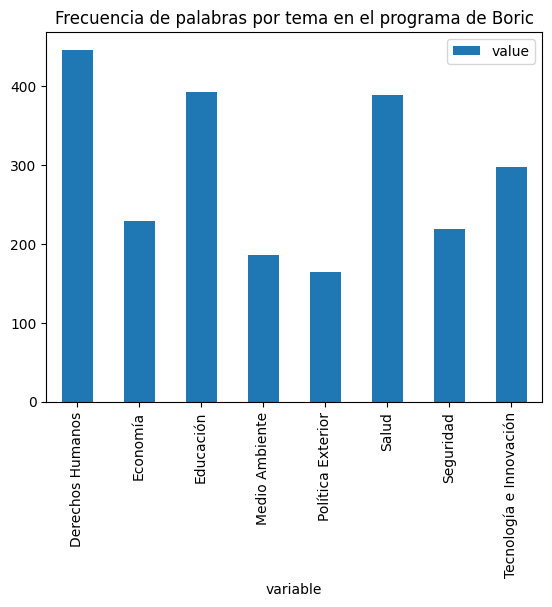

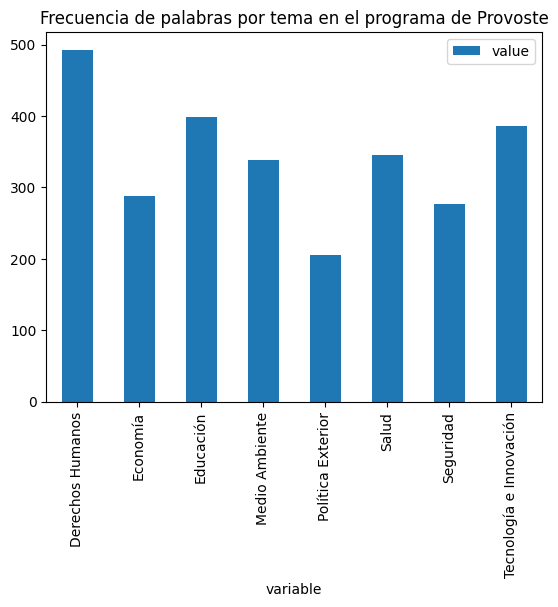

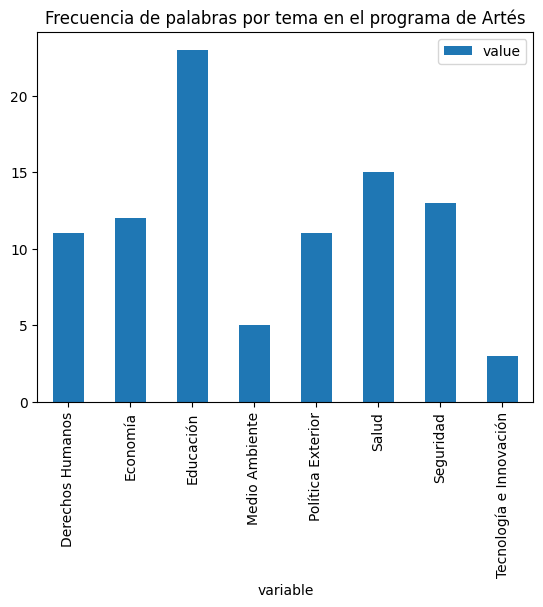

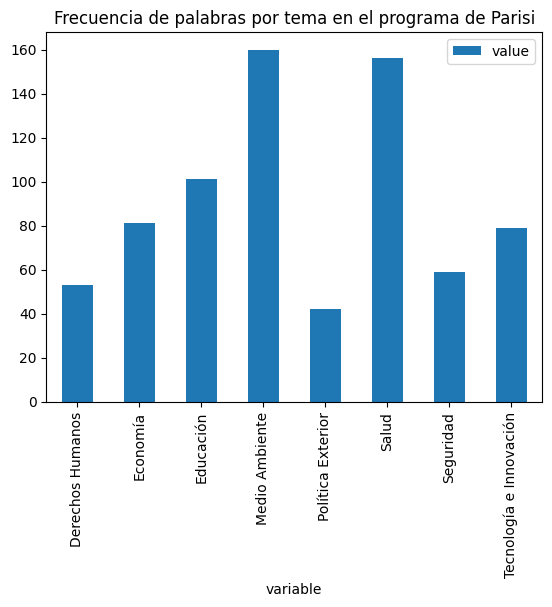

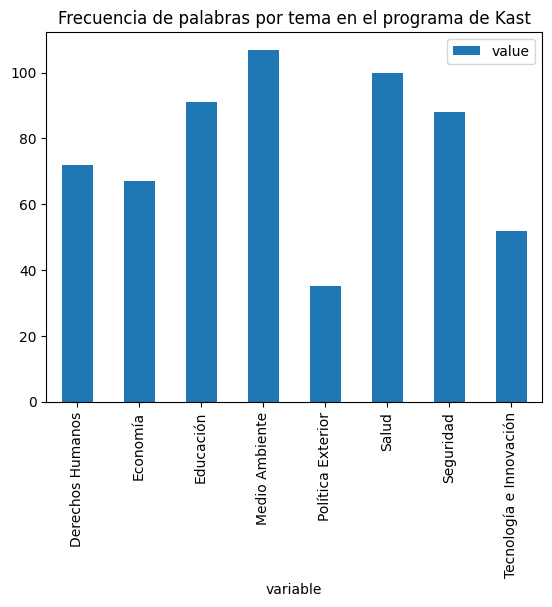

In [ ]:
for programa, candidato in zip(contenido_archivos, Candidatos):
    fr = contar_freq_palabras(programa, temas_palabras)
    df_fr = pd.DataFrame(fr)
    columnas = df_fr.columns
    long_fr = df_fr.melt(value_vars=columnas, ignore_index=False).reset_index()
    long_fr= long_fr[long_fr.value.notnull()]

    agrupado = long_fr.groupby('variable').agg('sum')

    agrupado.plot.bar(title = f'Frecuencia de palabras por tema en el programa de {candidato}')
